The purpose of this exercise and notebook is to develop a change point algorithm in accordance with the 2002 paper by Sullivan. For this process, theoretical "boundaries" are established between each piece of data. This effectively divides the data into clusters with one resident each. The dk value is calculated across each boundary in accordance with the Sullivan paper. The two data points that have the smallest dk value, which roughly translates to the smallest distance between the two points, are then clustered. The boundary between them is removed, a new center is established by taking the mean of the two points, and the dk value recorded along with the location of the boundary being eliminated. This data is then graphed and evaluated.

Please note - if the code comes up with an error of min(args) is empty, it means you need to clear the kernel and rerun the code.

Importing needed packages and setting up initial arrays.
m is number of data points in each cluster.
initial data is initial data.
boundaries is the boundary locations.
dx will hold the dk values for each round.
dk will record the lowest dk value from each round.
lk will hold the location of the boundary eliminated for each round.

In [7]:
#numpy, csv, math, and matplot.lib are all useful libraries
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

# this is the data that we are going to start out with
# importing data the long way to make sure it is in an array format
initial_data = []
# the "r" string prefix forces the interpriter to see the string as regular expression, preventing it from evaluating the backslashes as special characters

#will be used later for the test data given
#with open(r"C:\Users\black\OneDrive\Documents\Quality Engineering\Sullivan\Sullivan Data.txt", 'r') as data_input:
    #for datum in data_input:
        #initial_data.append(float(datum))

#introducing the data from the Sullivan paper as initial data
#initial_data = [1.19,1.23,1.51,-0.531,-0.705,0.429,1.6,1.830,1.56,0.661,-0.727,-0.536,0.21,-0.626,0.933,-1.58,-1.49,-2.4,-0.71,-0.691,-2.31,0.21,-1.46,0.21,1.28,1.43,1.59,0.252,-0.04,2.61,1.63,1.59,0.407,-0.128,1.84,.346,-.104,-1.85,-0.41,-0.75,-1.95,0.33,-1.46,-0.757,-1.1,-2.21,-0.502,-0.752,1.38,1.34,.1,1.23,-0.04,2.61,.379,.937,-0.176,-0.279,0.333,1.21]

#data from the example in class
initial_data = [3,4,2,5,7,6,8]

#creates an array consisting of only 1's the same length as the initial data to create the clusters with one data point
m = [1]*len(initial_data)

#list command for boundaries creates an array that is 1,2,3,4... for the length of the data
boundaries = list(range(len(initial_data)))
dk=[]
lk=[]
dx=[]


In [8]:
#function to find the standard deviation of the data to be used in dk equation
def find_std(*args):
    sumx=0
    sum2x=0
    std=0
    for i in range(len(initial_data)):
        sumx = sumx+initial_data[i]
        sum2x = sum2x + initial_data[i]**2
        n = len(initial_data)
        std = ((sum2x-((sumx**2)/n))/(n-1))**0.5
    return(std)

In [9]:
# function to calculate the difference between adjacent members in the array
def find_dx(*args):
    dx=[]
    # initialize the new array
    # cycle through all data in the array
    
    for i in range(len(initial_data)-1):
        # calculate d and add each calculated value to our new array
        numerator = abs(initial_data[i]-initial_data[i+1])
        denominator = find_std()*(( (m[i]+m[i+1]) / (m[i]*m[i+1]) )**0.5)
        dx.append(numerator/denominator)
    # output our array from the function	
    return(dx)

In [10]:
def change_arrays(*args):
    
    #currently finds minimum in the dx, records to dk
    dk.append(min(find_dx(dx)))
    print('dk= ',dk)
    
    #finds index number of that minimum, sets equal to ind
    ind = find_dx(dx).index(min(find_dx(dx)))
    print(ind)
    
    #records boundary to be eliminated in lk
    lk.append(boundaries[ind])
    print(lk)
    
    #eliminates boundary
    del boundaries[ind]
    print(boundaries)
    
    #adds number of records in k+1 cluster to the k cluster in m array, eliminates k+1 cluster
    m[ind] = m[ind] + m[ind+1]
    del m[ind+1]
    print(m)
    
    #changes initial data to reflect clustering
    initial_data[ind] = (initial_data[ind] + initial_data[ind+1]) / 2
    del initial_data[ind+1]
    print(initial_data)
    
    return(dk,lk,ind,m,boundaries, initial_data)


In [11]:
dk,lk,ind,m,boundaries,initial_data = change_arrays(find_dx())


dk=  [0.3273268353539885]
0
[0]
[1, 2, 3, 4, 5, 6]
[2, 1, 1, 1, 1, 1]
[3.5, 2, 5, 7, 6, 8]


In [12]:
for i in range (len(initial_data)-1):
    #find_std(initial_data)
    find_dx(initial_data,m,dx)
    change_arrays(dk,lk,m,boundaries,initial_data)

dk=  [0.3273268353539885, 0.31702131247412063]
3
[0, 4]
[1, 2, 3, 5, 6]
[2, 1, 1, 2, 1]
[3.5, 2, 5, 6.5, 8]
dk=  [0.3273268353539885, 0.31702131247412063, 0.5163977794943223]
0
[0, 4, 1]
[2, 3, 5, 6]
[3, 1, 2, 1]
[2.75, 5, 6.5, 8]
dk=  [0.3273268353539885, 0.31702131247412063, 0.5163977794943223, 0.5468687416197306]
1
[0, 4, 1, 3]
[2, 5, 6]
[3, 3, 1]
[2.75, 5.75, 8]
dk=  [0.3273268353539885, 0.31702131247412063, 0.5163977794943223, 0.5468687416197306, 0.7397954428741078]
1
[0, 4, 1, 3, 5]
[2, 6]
[3, 4]
[2.75, 6.875]
dk=  [0.3273268353539885, 0.31702131247412063, 0.5163977794943223, 0.5468687416197306, 0.7397954428741078, 1.8516401995451028]
0
[0, 4, 1, 3, 5, 2]
[6]
[7]
[4.8125]


Setting up code for figures using matplot.lib. Figure 1 (ax1) depicts the dk values stored in reverse, so the last boundary eliminated. This is acieved through the lk[::-1] and dk[::-1] syntax. Gridlines were included to allow for easier interpretation.

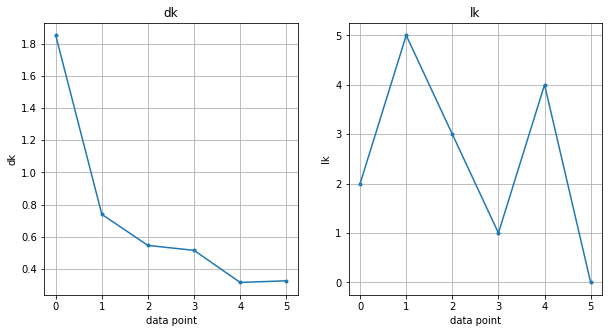

In [13]:
fig=plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(dk[::-1],label="dk", marker = '.')
ax1.set_title("dk")
ax1.set_xlabel("data point")
ax1.set_ylabel("dk")
#sets up grid lines
ax1.grid(which='both')

ax2.plot(lk[::-1], label = "lk", marker = '.')
ax2.set_title("lk")
ax2.set_xlabel("data point")
ax2.set_ylabel("lk")
ax2.grid(which = 'both')


The results of this code are exactly the same as the outcome generated in class, as shown in the online textbook. This data set has only one major change point at location 2, between the third and fourth data point. This can be seen easily with this data set, as the largest gap exists between the 2 and the 5.

# Sullivan Data

Now we will rerun the code using the data presented in the SUllivan paper to compare the outcomes.

In [14]:
#numpy, csv, math, and matplot.lib are all useful libraries
import numpy as np
import csv
import math
import matplotlib.pyplot as plt


# this is the data that we are going to start out with
# importing data the long way to make sure it is in an array format
initial_data = []
# the "r" string prefix forces the interpriter to see the string as regular expression, preventing it from evaluating the backslashes as special characters

#will be used later for the test data given
#with open(r"C:\Users\black\OneDrive\Documents\Quality Engineering\Sullivan\Sullivan Data.txt", 'r') as data_input:
    #for datum in data_input:
        #initial_data.append(float(datum))

#introducing the data from the Sullivan paper as initial data
initial_data=[1.19,1.23,1.51,-0.531,-0.705,0.429,1.6,1.83,1.56,0.661,-0.727,-0.536,0.21,-0.626,0.933,-1.58,-1.49,-2.4,-0.71,-0.691,-2.31,0.21,-1.46,0.21,1.28,1.43,1.59,0.252,-0.04,2.61,1.63,1.59,0.407,-0.128,1.84,0.346,-0.104,-1.850,-0.410,-0.75,-1.95,0.33,-1.46,-0.757,-1.1,-2.21,-0.502,-0.752,1.38,1.34,0.1,1.23,-0.04,2.61,0.379,0.937,-0.176,-0.279,0.333,1.21]

#creates an array consisting of only 1's the same length as the initial data to create the clusters with one data point
m = [1]*len(initial_data)

#list command for boundaries creates an array that is 1,2,3,4... for the length of the data
boundaries = list(range(len(initial_data)))
dk=[]
lk=[]
dx=[]


In [15]:
#function to find the standard deviation of the data to be used in dk equation
def find_std(*args):
    sumx=0
    sum2x=0
    std=0
    for i in range(len(initial_data)):
        sumx = sumx+initial_data[i]
        sum2x = sum2x + initial_data[i]**2
        n = len(initial_data)
        std = ((sum2x-((sumx**2)/n))/(n-1))**0.5
    return(std)

In [16]:
# function to calculate the difference between adjacent members in the array
def find_dx(*args):
    dx=[]
    # initialize the new array
    # cycle through all data in the array
    
    for i in range(len(initial_data)-1):
        # calculate d and add each calculated value to our new array
        numerator = abs(initial_data[i]-initial_data[i+1])
        denominator = (( (m[i]+m[i+1]) / (m[i]*m[i+1]) )**0.5)
        dx.append(numerator/denominator)
    # output our array from the function	
    return(dx)

In [17]:
def change_arrays(*args):
    
    #currently finds minimum in the dx, records to dk
    dk.append(min(find_dx(dx)))
    print('dk= ',dk)
    
    #finds index number of that minimum, sets equal to ind
    ind = find_dx(dx).index(min(find_dx(dx)))
    print(ind)
    
    #records boundary to be eliminated in lk
    lk.append(boundaries[ind])
    print(lk)
    
    #eliminates boundary
    del boundaries[ind]
    print(boundaries)
    
    #adds number of records in k+1 cluster to the k cluster in m array, eliminates k+1 cluster
    m[ind] = m[ind] + m[ind+1]
    del m[ind+1]
    print(m)
    
    #changes initial data to reflect clustering
    initial_data[ind] = (initial_data[ind] + initial_data[ind+1]) / 2
    del initial_data[ind+1]
    print(initial_data)
    
    return(dk,lk,ind,m,boundaries, initial_data)

In [18]:
dk,lk,ind,m,boundaries,initial_data = change_arrays(find_dx())

dk=  [0.013435028842544414]
18
[18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1.19, 1.23, 1.51, -0.531, -0.705, 0.429, 1.6, 1.83, 1.56, 0.661, -0.727, -0.536, 0.21, -0.626, 0.933, -1.58, -1.49, -2.4, -0.7004999999999999, -2.31, 0.21, -1.46, 0.21, 1.28, 1.43, 1.59, 0.252, -0.04, 2.61, 1.63, 1.59, 0.407, -0.128, 1.84, 0.346, -0.104, -1.85, -0.41, -0.75, -1.95, 0.33, -1.46, -0.757, -1.1, -2.21, -0.502, -0.752, 1.38, 1.34, 0.1, 1.23, -0.04, 2.61, 0.379, 0.937, -0.176, -0.279, 0.333, 1.21]


In [19]:
for i in range (len(initial_data)-1):
    find_std(initial_data)
    find_dx(initial_data,m,dx)
    change_arrays(dk,lk,m,boundaries,initial_data)



dk=  [0.013435028842544414, 0.028284271247461766]
29
[18, 30]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1.19, 1.23, 1.51, -0.531, -0.705, 0.429, 1.6, 1.83, 1.56, 0.661, -0.727, -0.536, 0.21, -0.626, 0.933, -1.58, -1.49, -2.4, -0.7004999999999999, -2.31, 0.21, -1.46, 0.21, 1.28, 1.43, 1.59, 0.252, -0.04, 2.61, 1.6099999999999999, 0.407, -0.128, 1.84, 0.346, -0.104, -1.85, -0.41, -0.75, -1.95, 0.33, -1.46, -0.757, -1.1, -2.21, -0.502, -0.752, 1.38, 1.34, 0.1, 1.23, -0.04, 2.61, 0.379, 0.937, -0.176, -0.279, 0.333, 1.21]
dk=  [0.013435028842544414, 0.028284271247461766, 0.028284271247461766]
46
[18, 30, 48]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

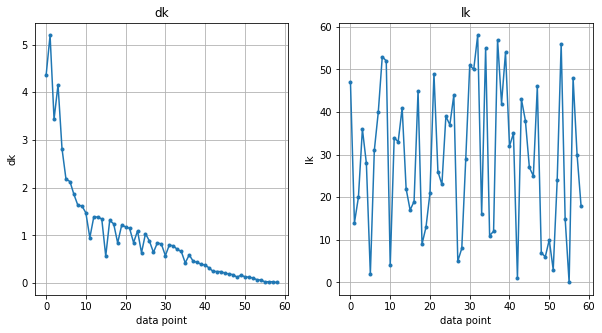

In [20]:
fig=plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(dk[::-1],label="dk", marker = '.')
ax1.set_title("dk")
ax1.set_xlabel("data point")
ax1.set_ylabel("dk")
#sets up grid lines
ax1.grid(which='both')

ax2.plot(lk[::-1], label = "lk", marker = '.')
ax2.set_title("lk")
ax2.set_xlabel("data point")
ax2.set_ylabel("lk")
ax2.grid(which = 'both')

The graphs shown above do not look like the graphs shown in the Sullivan paper. The above graphs indicate about five change points at the 47th, 14th, 20th, 36, and 26th boundaries, whereas the Sullivan paper data has only four at the 48th, 37th, 23rd, and 15th booundaries. The locations are in about the same place but occur in a different order and have different dk values. This may indicate a difference in how the mean values were calculated between this program and Sullivans. I am unsure where the variation is coming from and cannot currently find the error in my code. This may also be a transcription error as the data was not available in raw form, so had to be transcribed by hand from the paper. 

# Test Data

Despite the differences between the results of this code and the Sullivan data, this code will now be used to analyze the test data provided in class.

In [21]:
#numpy, csv, math, and matplot.lib are all useful libraries
import numpy as np
import csv
import math
import matplotlib.pyplot as plt


# this is the data that we are going to start out with
# importing data the long way to make sure it is in an array format
initial_data = []
# the "r" string prefix forces the interpriter to see the string as regular expression, preventing it from evaluating the backslashes as special characters


with open(r"C:\Users\black\OneDrive\Documents\Quality Engineering\Sullivan\Sullivan Data.txt", 'r') as data_input:
    for datum in data_input:
        initial_data.append(float(datum))

#creates an array consisting of only 1's the same length as the initial data to create the clusters with one data point
m = [1]*len(initial_data)

#list command for boundaries creates an array that is 1,2,3,4... for the length of the data
boundaries = list(range(len(initial_data)))
dk=[]
lk=[]
dx=[]


In [22]:
#function to find the standard deviation of the data to be used in dk equation
def find_std(*args):
    sumx=0
    sum2x=0
    std=0
    for i in range(len(initial_data)):
        sumx = sumx+initial_data[i]
        sum2x = sum2x + initial_data[i]**2
        n = len(initial_data)
        std = ((sum2x-((sumx**2)/n))/(n-1))**0.5
    return(std)

In [23]:
# function to calculate the difference between adjacent members in the array
def find_dx(*args):
    dx=[]
    # initialize the new array
    # cycle through all data in the array
    
    for i in range(len(initial_data)-1):
        # calculate d and add each calculated value to our new array
        numerator = abs(initial_data[i]-initial_data[i+1])
        denominator = (( (m[i]+m[i+1]) / (m[i]*m[i+1]) )**0.5)
        dx.append(numerator/denominator)
    # output our array from the function	
    return(dx)

In [24]:
def change_arrays(*args):
    
    #currently finds minimum in the dx, records to dk
    dk.append(min(find_dx(dx)))
    print('dk= ',dk)
    
    #finds index number of that minimum, sets equal to ind
    ind = find_dx(dx).index(min(find_dx(dx)))
    print(ind)
    
    #records boundary to be eliminated in lk
    lk.append(boundaries[ind])
    print(lk)
    
    #eliminates boundary
    del boundaries[ind]
    print(boundaries)
    
    #adds number of records in k+1 cluster to the k cluster in m array, eliminates k+1 cluster
    m[ind] = m[ind] + m[ind+1]
    del m[ind+1]
    print(m)
    
    #changes initial data to reflect clustering
    initial_data[ind] = (initial_data[ind] + initial_data[ind+1]) / 2
    del initial_data[ind+1]
    print(initial_data)
    
    return(dk,lk,ind,m,boundaries, initial_data)

In [25]:
dk,lk,ind,m,boundaries,initial_data = change_arrays(find_dx())

dk=  [0.007071067811864068]
15
[15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[20.99, 19.87, 18.75, 20.59, 20.45, 20.68, 21.06, 19.47, 19.88, 22.96, 19.27, 17.46, 16.62, 20.06, 18.02, 18.075, 21.47, 20.22, 18.55, 21.3, 26.42, 26.54, 25.5, 25.28, 22.64, 25.79, 24.92, 22.16, 24.2, 24.73, 25.0, 26.94, 26.72, 27.68, 24.96, 21.46, 24.24, 25.29, 20.98]


In [26]:
for i in range (len(initial_data)-1):
    find_std(initial_data)
    find_dx(initial_data,m,dx)
    change_arrays(dk,lk,m,boundaries,initial_data)



dk=  [0.007071067811864068, 0.0449073119510247]
14
[15, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[20.99, 19.87, 18.75, 20.59, 20.45, 20.68, 21.06, 19.47, 19.88, 22.96, 19.27, 17.46, 16.62, 20.06, 18.0475, 21.47, 20.22, 18.55, 21.3, 26.42, 26.54, 25.5, 25.28, 22.64, 25.79, 24.92, 22.16, 24.2, 24.73, 25.0, 26.94, 26.72, 27.68, 24.96, 21.46, 24.24, 25.29, 20.98]
dk=  [0.007071067811864068, 0.0449073119510247, 0.08485281374238389]
19
[15, 14, 21]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[20.99, 19.87, 18.75, 20.59, 20.45, 20.68, 21.06, 19.47, 19.88, 22.96, 19.27, 17.

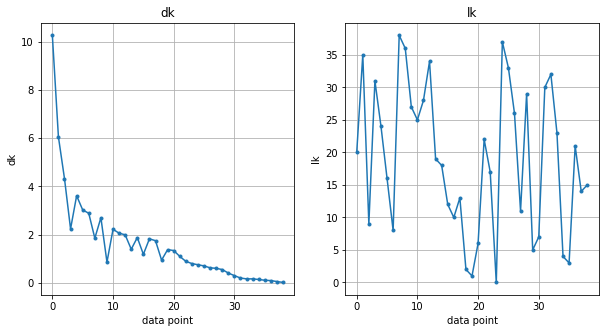

In [27]:
fig=plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(dk[::-1],label="dk", marker = '.')
ax1.set_title("dk")
ax1.set_xlabel("data point")
ax1.set_ylabel("dk")
#sets up grid lines
ax1.grid(which='both')

ax2.plot(lk[::-1], label = "lk", marker = '.')
ax2.set_title("lk")
ax2.set_xlabel("data point")
ax2.set_ylabel("lk")
ax2.grid(which = 'both')

The results of this test indicate that this data set has three change points at the 20th, 35th, and 9th boundaries, dividing this set into four clusters. The clusters indicated are seen below. Looking at the raw data graph below, the change points are located at boundaries that make logical sense.

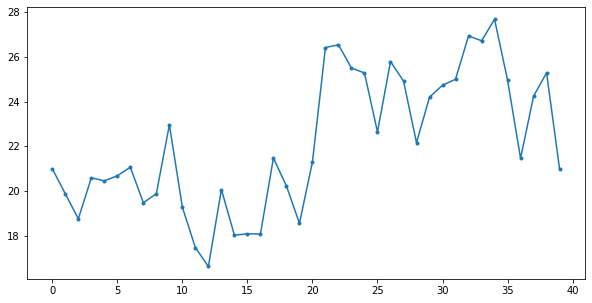

In [28]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
initial_data = []

with open(r"C:\Users\black\OneDrive\Documents\Quality Engineering\Sullivan\Sullivan Data.txt", 'r') as data_input:
    for datum in data_input:
        initial_data.append(float(datum))

fig=plt.figure(figsize=(10,5))
ax3 = fig.add_subplot(111)

ax3.plot(initial_data, label="X-values", marker = '.')

The presence of change points indicates that the process this data comes from is not at a steady state, as it is having frequent and significant changes in the mean. This also means that the data does not conform with i.i.d, as to be independent and identically distributed, all data must come from the same distribution. This requires a constant mean and variation, which is impossible if the data is undergoing frequent mean shifts.